In [1877]:
# importing packages
import pandas as pd

#dvierse
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from scipy import stats
from sklearn import preprocessing

# for prediciting
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV



# for assessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [1852]:
# importing data
df_raw = pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/05_Term 3/04_HDI/01_Code/01_Input/210517_syn_data.csv')

In [1853]:
# drop not necessary index
df_raw = df_raw.drop(columns = ['Unnamed: 0'])


Approach:
- Dataset understanding
    - Split between Contract info, Customer info, property info, contract part, product description, damage description, damage target
- Check Cleaning & Scale
    - Data received clean, hence not cleaning to be performed
        - MinMaxScaler
        - StandardScaler
        - RobustScaler
        - Outlier reduction based on z-score
        - Bucketing for Neural Network
- Check Multilinearity (Check Feature Correlation)
- Run Lasso Regression to define the relevant Attributes
- Creation of Algorithms (Try using lazy predict)
    - Multilinear Regression
    - Naive Bayes
    - Adapt Boost
    - XG Boost
    - Random Forest
- Parameter Tuning (What do we want to optimize)
- Conclusion Discussion and Interpretation

In [1854]:
df_raw.describe()

### mean and standard deviation are not around 0, hence scaling has to be done

,CONTRACT_INFO_0,CONTRACT_INFO_1,CONTRACT_INFO_2,CONTRACT_INFO_3,CONTRACT_INFO_4,CONTRACT_INFO_5,CONTRACT_INFO_6,CONTRACT_INFO_7,CUSTOMER_INFO_0,CUSTOMER_INFO_1,...,DAMAGE_DESCRIPTION_2,DAMAGE_DESCRIPTION_3,DAMAGE_DESCRIPTION_4,DAMAGE_DESCRIPTION_5,DAMAGE_DESCRIPTION_6,DAMAGE_DESCRIPTION_7,DAMAGE_DESCRIPTION_8,DAMAGE_DESCRIPTION_9,DAMAGE_DESCRIPTION_10,CONTRACT_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,220.439070,0.136420,103502.000000,131.626250,0.859490,0.001470,218.826867,195.701800,4.335420,549.715150,...,0.000310,0.000350,0.000230,0.00021,0.487760,0.208190,0.033410,0.175490,0.103100,11270.664920
std,90.172758,0.496117,34851.981904,51.997967,0.347517,0.038313,247.499933,83.759818,0.948748,159.104597,...,0.017604,0.018705,0.015164,0.01449,0.499853,0.406015,0.179706,0.380388,0.304091,6786.492149
min,20.000000,0.000000,50000.000000,50.000000,0.000000,0.000000,0.000000,70.000000,0.000000,250.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,150.000000,0.000000,75000.000000,100.000000,1.000000,0.000000,0.000000,148.000000,4.000000,447.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5033.000000
50%,223.000000,0.000000,100000.000000,125.000000,1.000000,0.000000,0.000000,183.000000,5.000000,504.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,11182.000000
75%,282.000000,0.000000,125000.000000,150.000000,1.000000,0.000000,500.000000,238.000000,5.000000,635.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,17293.000000
max,420.000000,2.000000,200000.000000,300.000000,1.000000,1.000000,500.000000,529.000000,6.000000,992.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,22755.000000


In [1855]:
# Selecting all numerical features to scale
numerical_to_scale = ['CONTRACT_INFO_0','CONTRACT_INFO_7', 'CUSTOMER_INFO_1', 'CUSTOMER_INFO_2', 'CUSTOMER_INFO_3', 'DAMAGE_DESCRIPTION_0', 'DAMAGE_DESCRIPTION_1' ]
num_to_s = df_raw[numerical_to_scale]

Data Exploration for features with continuous data

In [ ]:
sns.boxplot(y='lifeExp', x='continent',
                 data=df1,
                 palette="colorblind",
                 hue='year')

<AxesSubplot:ylabel='CONTRACT_INFO_0'>

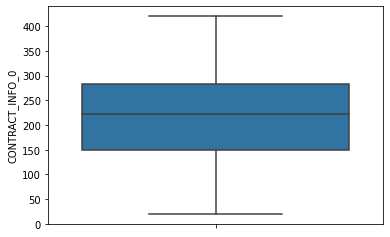

In [1856]:
sns.boxplot(y=num_to_s['CONTRACT_INFO_0'])

<AxesSubplot:ylabel='CONTRACT_INFO_7'>

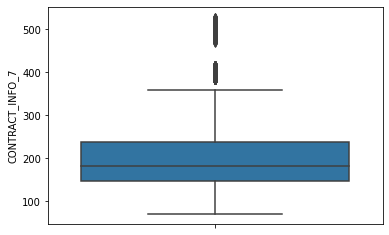

In [1857]:
sns.boxplot(y=num_to_s['CONTRACT_INFO_7'])

<AxesSubplot:ylabel='CUSTOMER_INFO_1'>

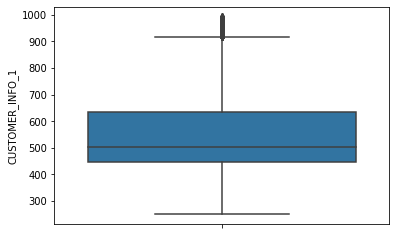

In [1858]:
sns.boxplot(y=num_to_s['CUSTOMER_INFO_1'])

<AxesSubplot:ylabel='CUSTOMER_INFO_2'>

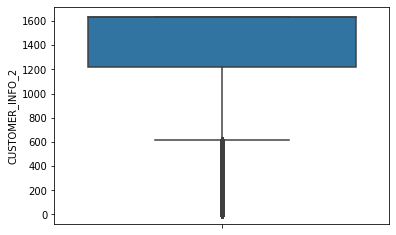

In [1859]:
sns.boxplot(y=num_to_s['CUSTOMER_INFO_2'])

<AxesSubplot:ylabel='CUSTOMER_INFO_3'>

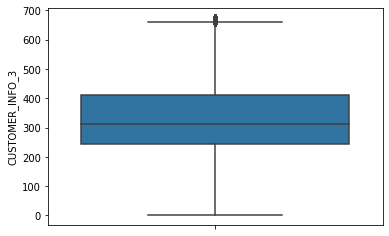

In [1860]:
sns.boxplot(y=num_to_s['CUSTOMER_INFO_3'])

<AxesSubplot:ylabel='DAMAGE_DESCRIPTION_0'>

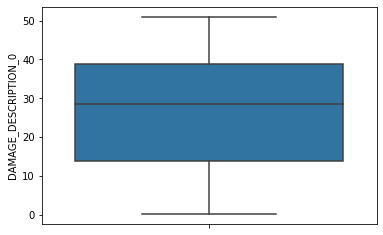

In [1861]:
sns.boxplot(y=num_to_s['DAMAGE_DESCRIPTION_0'])

<AxesSubplot:ylabel='DAMAGE_DESCRIPTION_1'>

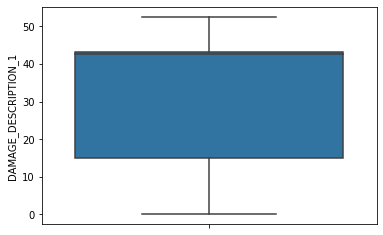

In [1862]:
sns.boxplot(y=num_to_s['DAMAGE_DESCRIPTION_1'])

In [1863]:
# split X from y, as target variable should remain original values and not adjusted to the scale
y = df_raw.DAMAGE_TARGET.values
X = df_raw.drop(columns = ['DAMAGE_TARGET', 'CONTRACT_ID'])
X_not_num = X.drop(columns=numerical_to_scale)

In [1864]:
X_not_num

,CONTRACT_INFO_1,CONTRACT_INFO_2,CONTRACT_INFO_3,CONTRACT_INFO_4,CONTRACT_INFO_5,CONTRACT_INFO_6,CUSTOMER_INFO_0,PROPERTY_INFO_0,PROPERTY_INFO_1,PROPERTY_INFO_2,...,PRODUCT_DESCRIPTION_11,DAMAGE_DESCRIPTION_2,DAMAGE_DESCRIPTION_3,DAMAGE_DESCRIPTION_4,DAMAGE_DESCRIPTION_5,DAMAGE_DESCRIPTION_6,DAMAGE_DESCRIPTION_7,DAMAGE_DESCRIPTION_8,DAMAGE_DESCRIPTION_9,DAMAGE_DESCRIPTION_10
0,0,50000,125,1,0,0.0,5,1,6,2,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,100000,150,1,0,500.0,5,1,2,2,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,125000,150,0,0,0.0,3,1,5,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,125000,150,1,0,500.0,5,1,1,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,75000,75,0,0,0.0,3,1,4,2,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,75000,125,1,0,0.0,4,1,2,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99996,0,125000,125,1,0,0.0,4,1,5,2,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,0,175000,75,1,0,0.0,5,1,1,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,0,100000,300,1,0,0.0,5,1,3,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1865]:
# to add columns back after scaling
columns = num_to_s.columns

# Standard Scaler

In [1866]:
### No Scaling - bad option as data is not normal distrobution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standard Scaler
scaler_ss = StandardScaler()
df_ss_num = pd.DataFrame(scaler_ss.fit_transform(num_to_s))
df_ss_num.columns = columns

# add back to non numerical
df_ss = pd.concat([df_ss_num, X_not_num], axis = 1)

# Split into train and test sets
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(df_ss, y, test_size=0.3, random_state=42)

# Robust Scaler

In [1867]:
scaler_rs = RobustScaler()
df_rs_num = pd.DataFrame(scaler_rs.fit_transform(num_to_s))
df_rs_num.columns = columns

# add back to non numerical
df_rs = pd.concat([df_rs_num, X_not_num], axis = 1)

# Split into train and test sets
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(df_rs, y, test_size=0.3, random_state=42)


# Min max Scaled

In [1868]:
scaler_mm = MinMaxScaler()
df_min_max_num = pd.DataFrame(scaler_mm.fit_transform(num_to_s))
df_min_max_num.columns = columns

# add back to non numerical
df_min_max = pd.concat([df_min_max_num, X_not_num], axis = 1)

# Split into train and test sets
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(df_min_max, y, test_size=0.3, random_state=42)


# Z-score approach

In [1869]:
z = np.abs(stats.zscore(num_to_s))
num_out = np.where(z > 3)

# percentage of outliers with chosen threshold = 3
per_out = str(round(len(num_out) / len(num_to_s),2) * 100) + '%'
per_out

# to delete outliers
num_to_final = num_to_s[(z < 3).all(axis=1)]

# deleted approx 1500 / 100'000 Rows due to outliers

Outliers very hard to scale, hence other apporach chosesn:
- Bucketing of continuous features into ranges
- Display them as integers
- Run NN, that will simply adjust weights of nodes accordingly (almost none for outliers)

# Bucketing

In [1870]:
# objective to optimize q, as this defines number of buckets

for i in numerical_to_scale:
    X['quantile_' + i] = pd.qcut(X[i],q=1000, labels = False, duplicates= 'drop')

X_final = X.drop(columns = numerical_to_scale)

In [1871]:
#checking out valuecounts for different buckets - outliers should basically have their own bucket
X_final.quantile_DAMAGE_DESCRIPTION_1.value_counts().tail()

149    100
213    100
277    100
341    100
959    100
Name: quantile_DAMAGE_DESCRIPTION_1, dtype: int64

# Multilayer Perceptron

In [1872]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_final, y,random_state=1)

regr = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100,50,25)).fit(X_train_nn, y_train_nn)

y_pred = regr.predict(X_test_nn)

regr.score(X_test_nn, y_test_nn)


0.020441095077307514

# Simple other models with scaled data (no bucketing), as R2 of MLP is very low

In [1873]:
lr = LinearRegression()
lr.fit(X_train_rs, y_train_rs)
y_pred_lr = lr.predict(X_test_rs)
lr.score(X_test_rs, y_test_rs)

0.029202023573599245

# XGboost

In [1884]:
# XGBoost does not work with categorical values
# No features and target variable are categorical (Int)

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.02, .025, .03], #so called `eta` value
              'max_depth': [3], #best
              'min_child_weight': [2,2.5,3],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_rs,
         y_train_rs)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[20:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.04980435710889497
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


training score: 0.02909256523264947
test score:  0.02960818121879427
number of features used:  27
training score for alpha=0.01: 0.02971452242730943
test score for alpha =0.01:  0.029276377101712825
number of features used: for alpha =0.01: 59
training score for alpha=0.0001: 0.029719120509735575
test score for alpha =0.0001:  0.029202811315990007
number of features used: for alpha =0.0001: 60
LR training score: 0.029719120983608183
LR test score:  0.029202023573599245


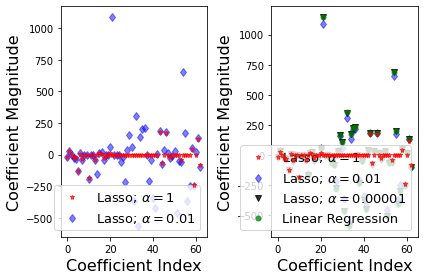

In [1875]:
lasso = Lasso()
lasso.fit(X_train_rs,y_train_rs)
train_score=lasso.score(X_train_rs,y_train_rs)
test_score=lasso.score(X_test_rs,y_test_rs)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train_rs,y_train_rs)
train_score001=lasso001.score(X_train_rs,y_train_rs)
test_score001=lasso001.score(X_test_rs,y_test_rs)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train_rs,y_train_rs)
train_score00001=lasso00001.score(X_train_rs,y_train_rs)
test_score00001=lasso00001.score(X_test_rs,y_test_rs)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train_rs,y_train_rs)
lr_train_score=lr.score(X_train_rs,y_train_rs)
lr_test_score=lr.score(X_test_rs,y_test_rs)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()
